# 2 chhosing the right model for outr Proble
### Types of problems
* classification 
* Regression 

In [1]:
import pandas as pd

In [2]:
import numpy as np


### 2.1 picking up  amodel for regression problem

In [3]:
import numpy as np

In [4]:
# Import california housing dataset from sklearn

In [5]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing(as_frame=True)
housing=housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
#split the data into X and Y
X=housing.drop('MedHouseVal',axis=1)
Y=housing['MedHouseVal']

In [7]:
# let's try the ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# split the data into train and test
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
np.random.seed(42)
model=Ridge()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)



0.6181366479315438

### How do we improve this model
### what if Ridge was not working

In [8]:
# let us try The random forest regressor model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8239810196403868

## 2.2 choosing estimator for a classification problem 


In [9]:
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
len(heart_disease)

303

In [11]:
# import the LinearSVc model from sklearn
from sklearn.svm import LinearSVC
np.random.seed(42)
# create X and Y
X=heart_disease.drop('target', axis=1)
Y=heart_disease['target']
# split the data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
model=LinearSVC()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.8688524590163934

# 4. Evaluating Machine Learning Model
## 3 ways of evaluating machine learning model
 1. Estimator score mehtod(score())
 2. The scoring parameter
 3. problem-specific Metric functions

## 4.2 Evaluating a model using scoring parameter

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
np.random.seed(42)
# create X and Y
X=heart_disease.drop('target', axis=1)
Y=heart_disease['target']
# split the data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
model=LinearSVC()
model.fit(X_train, Y_train)
cross_val_score(model, X,Y, cv=5) # evaluate the model using cross-validation with 5 folds

array([0.81967213, 0.86885246, 0.83606557, 0.86666667, 0.71666667])

In [13]:
np.random.seed(42)
# single training and test split score
single_split_score=model.score(X_test,Y_test)
# Take the mean of 5-fold cross-validation
clf_cross_val_score=np.mean(cross_val_score(model,X,Y))
# compare both
single_split_score,clf_cross_val_score

(0.8688524590163934, np.float64(0.8215846994535518))

## 4.2.1 Classification model evaluation metrics
 1. Accuracy
 2. Area under Roc Curve
 3. Confusion matrix
 4. Classification report
 ### Accuracy 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
# create X and Y
X=heart_disease.drop('target', axis=1)
Y=heart_disease['target']
clf=RandomForestClassifier()
clf_cross_value_score=cross_val_score(clf,X,Y,cv=5)
print(f'Heart disease classifier Accuracy: {np.mean(clf_cross_value_score)*  100:.2f}%')

Heart disease classifier Accuracy: 82.48%


## Area under the receiver operating characterstics(AUC, ROC)
* Roc=comparison of  amodels true positive rate versus false positive rate 
tpr=model predicts 1 when truth 1
fpr= model predicts 1 when truth 0


In [18]:
from sklearn.metrics import roc_curve
np.random.seed(42)
# make predictions with the probabilities
clf.fit(X_train,Y_train)

y_probs=clf.predict_proba(X_test)
y_probs[:10]

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.16, 0.84],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.53, 0.47]])

In [19]:
y_probs_positive=y_probs[:,1]

In [20]:
y_probs_positive

array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47, 0.81,
       0.36, 0.93, 0.13, 0.96, 0.97, 0.99, 0.08, 0.02, 0.06, 0.46, 0.1 ,
       0.65, 0.77, 0.65, 0.66, 0.79, 0.7 , 0.1 , 0.88, 0.09, 0.09, 0.03,
       0.33, 0.53, 0.19, 0.59, 0.78, 0.59, 0.87, 0.81, 0.74, 0.84, 0.66,
       0.71, 0.24, 0.55, 0.99, 0.16, 0.06, 0.35, 0.19, 0.85, 0.66, 0.24,
       0.1 , 0.41, 0.94, 0.14, 0.  , 0.19])

In [21]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds=roc_curve(Y_test,y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.06896552, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.24137931, 0.24137931, 0.31034483, 0.4137931 , 0.44827586,
       0.51724138, 0.55172414, 0.65517241, 0.68965517, 0.72413793,
       0.86206897, 1.        ])

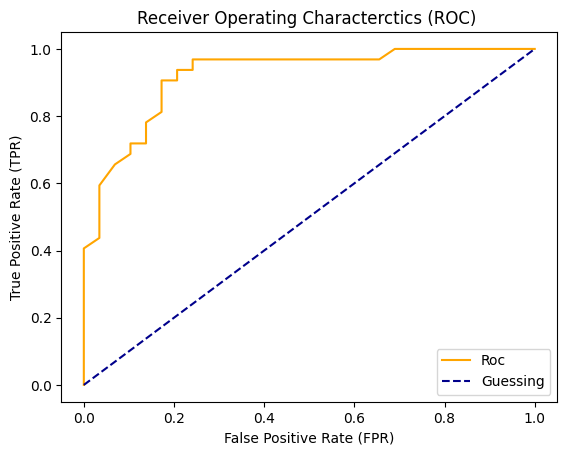

In [22]:
# create a function to plot Roc curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange', label='Roc')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characterctics (ROC) ')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_probs_positive)

0.9202586206896551

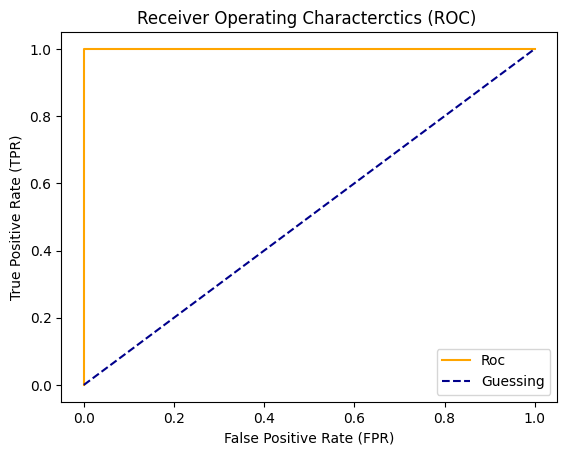

In [24]:
# plot perfect Roc curve and auc score
fpr, tpr,thersholds=roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [25]:
# perfect AUC score
roc_auc_score(Y_test,Y_test)

1.0

## confussion matrix
 : is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict 
 In essence giving you an idea of where the model is getting confused

In [28]:
# import confussion matrix
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
y_preds[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [29]:
Y_test[:10]

179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
Name: target, dtype: int64

In [30]:
confusion_matrix(Y_test,y_preds)

array([[24,  5],
       [ 5, 27]])

In [31]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


<Axes: >

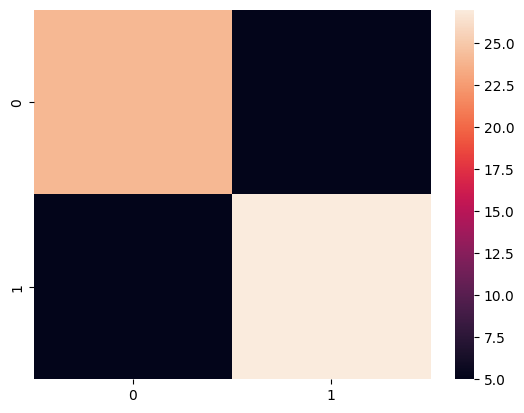

In [33]:
# make our confusion matrix more visual with seaborn heatmap
import seaborn as sns
confusion_matrix
# create a confussion matric
conf=confusion_matrix(Y_test,y_preds)
# plot it using seaborn heatmap
sns.heatmap(conf)

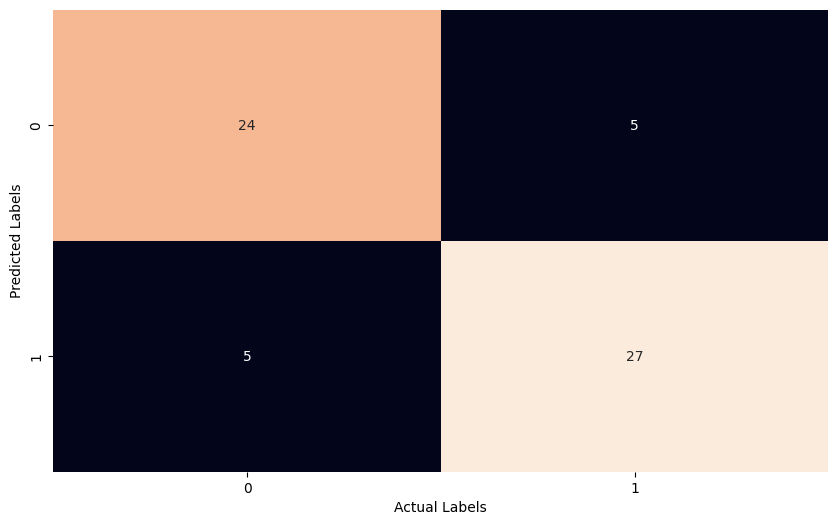

In [34]:
def plot_conf_map(conf):
    fig, ax=plt.subplots(figsize=(10,6))
    ax=sns.heatmap(conf, annot=True,cbar=False)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.show()
plot_conf_map(conf)

